# Oscilador harmônico : Um estudo sobre derivadas fracionadas

*   PET - Física UFRN
*   Petiano : Matheus Felipe Freitas Tomaz
*   Data : 08 de Agosto de 2023

O objetivo desse `Notebook` é resolver numericamente a equação diferencial do oscilador harmônico sobre um força externa senoidal usando o conceito de derivadas fracionadas e uma variação do método de Adam-Bashforth fracionário.**[1]**.

Esse Notebook está divido nas sequintes seções :

*   **Equações diferenciais fracionadas**
*   **Método**
*   **Aplicação** 
*   **Conclusão**

## Pré - requisitos

### Conhecimento prévio

É importante que o leitor já tenha tido um breve contato com o problema do oscilador harmônico e equações diferenciais para melhor entendimento da física e da matemática que será desenvolvida neste material.

### Definições e relações matemáticas importantes

#### Funções especiais

    Função Beta :

$$\tag{Def.1}\beta(q,p) = \int_0^t t^{p-1}(1-t)^{q-1}dt$$

    Função Gama:

$$\tag{Def.2} \Gamma(p) = \int_0^\infty e^{-t}t^{p-1}dt$$

    Função de Mittag-Leffler de dois parâmetros :

$$\tag{Def.2} E_{\alpha,\beta}(t) = \sum_{k=0}\frac{t^k}{\Gamma(k\alpha + \beta)}$$

#### Relações importantes

$$\tag{Rel.1}\beta(q,p) = \frac{\Gamma(q)\Gamma(p)}{\Gamma(q+p)}$$

## Importando bibliotecas necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial


%matplotlib inline

def opt_plot():
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.rcParams['font.family'] = 'monospace'
    plt.rcParams['font.size'] = 15
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)
    
import warnings
warnings.filterwarnings('ignore')

### Detalhes das bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.9.2 64bit [MSC v.1928 64 bit (AMD64)]
IPython 7.25.0
OS Windows 10 10.0.19041 SP0
Matplotlib 3.4.2
Numpy 1.21.0
Wed Aug 02 17:09:11 2023 Hora oficial do Brasil

## 1. Equações diferenciais fracionadas

****

### 1.1 Introdução

Embora pouco popular, o Cálculo Fracionário é mais antigo do que imaginamos. A sua origem é contemporânea do cálculo diferencial de ordem inteira, tradicionalmente estudado nos cursos universitários. O indício do surgimento dessa generalização do cálculo de ordem inteira é datado no século dezessete numa carta que L’Hôspital enviou a Leibniz indagando sobre a possibilidade de uma derivada de ordem $\frac{1}{2}$. A resposta dada por Leibniz culminou na introdução das primeiras definições de derivada e integral de ordem não-inteira.

Na seção 2 apresentaremos um método numérico para equações fracionárias e análogo ao método de Adams-Bashforth para equações diferenciais de ordem inteira. Na seção 3 apresentaremos uma aplicação direta do cáculo fracionada para resolver o problema do oscilador harmônico sujeito a um força externa senoidal. Enquanto na seção 4 elencamos as considerações finais e perspectivas.

### 1.2 Definição de Caputo

No bojo das aplicações, um exemplo foi o matemático Abel, que em 1823 usou a derivada fracionária para estudar o conhecido problema da tautócrona. O estudo de Abel é considerado como a primeira aplicação prática do cálculo fracionário. Já em 1892, surge a definição de derivada e integral fracionária proposta por Riemann-Liouville. Tal definição é muito estudada até hoje, e tem sido aplicada na modelagem de diversos problemas. Contudo, a derivada fracionária de Riemann-Liouville mostrou-se um pouco obsoleta por alguns motivos, sendo um deles o fato da possibilidade da derivada fracionária de uma constante ser diferente de zero **[3]**. A partir desse problema, em 1967 emerge a derivada fracionária proposta por Michele Caputo **[4]**, a qual soluciona parte dos desconfortos oriundos da versão de Riemann-Liouville, e principalmente por esse motivo, tem sido aplicada de forma abundante em problemas da física e da engenharia.

   Definição : A derivada fracionária de Caputo de ordem $\alpha$ é definida por 

$$\tag{1} \textbf{D}^{\alpha}_{t}f(t) = \frac{1}{\Gamma (n-\alpha)}\int_0^t \frac{f^{(n)}(u)}{(t-u)^{\alpha-n+1}}du$$

Em que $\alpha \in \mathbb{R}_{>0}$, $b \in \mathbb{R}$, $n=[\alpha]$ e $f^{(n)}(u) = \frac{d^nf(u)}{du^n}$ é a n-ésima derivada de ordem inteira. As derivadas de Caputo são válidas para $\alpha \in \mathbb{C}$, desde que $\mathfrak{R(\alpha)>0}$, no entanto, aqui será considerado apenas $\alpha \in \mathbb{R}_{>0}$.

## 2. Método 

****

### 2.1 Desenvolvimento analítico

Diferentemente das derivadas comuns de ordem inteira, que são funcionais locais, as derivadas fracionárias, por definição, são funcionais que possuem uma memória total de estados passados. Isso se deve ao fato das derivadas fracionárias serem definidas a partir de uma convolução entre um núcleo e uma função. Essa observação nos leva a crer que os métodos do tipo Runge-Kutta não serão os mais eficientes para tratar as equações fracionárias, exatamente por levarem em consideração apenas o comportamento local da função. Notamos aqui que métodos dessa forma podem ser facilmente estendidos para os casos de equações diferenciais fracionárias através da série de Taylor generalizada e são encontrados na literatura apresentando bons resultados para casos particulares. Apesar disso, nosso interesse é trabalhar com um método numérico que não tenha as limitações locais dos métodos do tipo Runge-Kutta. Portanto, iremos descrever nessa seção um método em duas etapas do tipo preditor-corretor, que pode ser visto como uma variação do método de Adams-Bashforth, para lidar com problemas do tipo dado pela Eq.2. O método aqui descrito é devido a Diethelm et al. que para maiores detalhes analíticos sobre o método, como análise de erro e convergência, podem ser encontrados nas referências **[1]**. A descrição do método aqui será feita de tal forma que o leitor possa desenvolver métodos numéricos análogos que possam satisfazer suas necessidades.

Aqui queremos tratar do problema de valor inicial dado pela equação diferencial fracionária

$$ \tag{2} \textbf{D}^{\alpha}_{t}y(t) = f(t,y(t)),$$

onde $\alpha \in (0,1)$ e $t \in (0,T)$, com a condição inicial $y(0) = y_0$.

Começamos a construção do método numérico definindo o operador integral,conhecido como integral fracionária de Riemann-Liouville, dado pela Eq.3 abaixo.

$$\tag{3} \textbf{J}^{\alpha}_{t}g(t) = \frac{1}{\Gamma (\alpha)}\int_0^t g(w)(t-w)^{\alpha-1}dw.$$

Aplicando o operador $\textbf{J}^{\alpha}_{t}$ em $\textbf{D}^{\alpha}_{t}$, temos que

$$ \textbf{J}^{\alpha}_{t}\textbf{D}^{\alpha}_{t}y(t) = \frac{1}{\Gamma (\alpha)}\int_0^t \textbf{D}^{\alpha}_{t} y(w)(t-w)^{\alpha-1}dw = \frac{1}{\Gamma (\alpha)}\int_0^t (t-w)^{\alpha-1} \times \left[\frac{1}{\Gamma(1-\alpha)}\int_0^w (w-\mu)^{-\alpha}y'(\mu)d\mu \right]dw$$

$$\tag{4} =\frac{1}{\Gamma (\alpha)}\frac{1}{\Gamma(1-\alpha)}\int_0^t (t-w)^{\alpha-1}dw \times \left[\int_0^w (w-\mu)^{-\alpha}y'(\mu)d\mu \right]dw.$$

Fazendo uma mudança na ordem da integração, podemos escrever a equação 4 como

$$\textbf{J}^{\alpha}_{t}\textbf{D}^{\alpha}_{t}y(t) = \frac{1}{\Gamma (\alpha)}\frac{1}{\Gamma(1-\alpha)}\int_0^t y'(\mu) \times \left[\int_\mu ^t(t-w)^{\alpha-1}(w-\mu)^{-\alpha}dw \right]d\mu.$$

Agora fazendo um mudança de variável $s= w-\mu$ podemos verificar que a intergal acima torna-se

$$\textbf{J}^{\alpha}_{t}\textbf{D}^{\alpha}_{t}y(t) = \frac{1}{\Gamma (\alpha)}\frac{1}{\Gamma(1-\alpha)}\int_0^t y'(\mu) \times \left[\int_\mu ^{t-\mu}s^{-\alpha}(t-\mu-s)^{\alpha-1}ds\right]d\mu $$

$$=\frac{1}{\Gamma (\alpha)}\frac{1}{\Gamma(1-\alpha)}\int_0^t y'(\mu) \times \left[\int_\mu ^{t-\mu}s^{-\alpha}(t-\mu)^{\alpha-1}\left(1 - \frac{s}{t-\mu}\right)^{\alpha-1}ds\right]d\mu.$$

Fazendo novamente uma mudança de varáveis $r=\frac{r}{t-\mu}$, temos que

$$\textbf{J}^{\alpha}_{t}\textbf{D}^{\alpha}_{t}y(t) = \frac{1}{\Gamma (\alpha)}\frac{1}{\Gamma(1-\alpha)}\int_0^t y'(\mu) \times \left[\int_0 ^1r^{(1-\alpha)-1}(1-r)^{\alpha-1}dr\right]d\mu.$$

A integral em $r$ pode ser resolvida usando a definição da função beta (Def.1) e função Gamma (Def.2), das quais se obtém a relação (Rel.1).

Fazendo $q=\alpha$ e $p=\alpha-1$, chegamos na relação integral que será base o desenvolvimento do nosso método

$$\textbf{J}^{\alpha}_{t}\textbf{D}^{\alpha}_{t}y(t)  = \int_0^t y'(\mu) = y(t) - y(0) = \frac{1}{\Gamma(\alpha)}\int_0^t(t-w)^{\alpha-1}g(w) dw$$

$$\tag{4} y(t) = y(0) + \frac{1}{\Gamma(\alpha)}\int_0^t(t-w)^{\alpha-1}g(w) dw,$$

onde $g(w) = f(w,y(w)).$

### 2.2 Desenvolvimento numérico

Para acharmos nosso solução numérico, primeiro precisamos discretizar as variáveis com as quais estamos trabalhando. Então, tomando um discretização equiespaça de $t$, temos $\{0=t_0,t_1,t_2,...t_{n+1}=T\}$, com $t_{k+1} - t_k = h$, para todo $k={0,1,2,...,n+1}$. Assim,

$$y_{k+1} = y(0) + \frac{1}{\Gamma(\alpha)}\int_0^{t_{k+1}}(t_{k+1}-w)^{\alpha-1}g(w) dw$$

$$ \tag{6} = y(0) + \frac{1}{\Gamma(\alpha)}\sum_{j=0}^k\int_{t_j}^{t_{j+1}}(t_{k+1}-w)^{\alpha-1}g(w) dw,$$

em que $y_{k} = y(t_k)$.

Agora, podemos tentar aproximar as integrais usando o método dos trapézios, considerando o termo $(t_{k+1} -w)^{\alpha-1}$ como uma função peso. Logo, sendo $g_{j+1}(w)$ a interpolação linear de $g_{j}(w)$, temos que

$$g_{j+1}(w) = \frac{w-t_j}{h}g(t_{j+1}) - \frac{w-t_{j+1}}{h}g(t_{j}).$$

Assim, as intergrais do lado direito tornam-se

$$\sum_{j=0}^k \int_{t_j}^{t_{j+1}}(t_{k+1}-w)^{\alpha-1}g(w) dw \approx \sum_{j=0}^k \int_{t_j}^{t_{j+1}}(t_{k+1}-w)^{\alpha-1}g_{j+1}(w) dw$$

$$=\sum_{j=0}^{k+1}\phi_{j,k+1}g(t_j),$$

em que os coeficientes são calculados através das seguintes integrais.

$$\phi_{j,k+1} = \frac{1}{h}\int_{t_j}^{t_{j+1}}(t_{k+1}-w)^{\alpha-1}(w-t_{j-1})g(w) dw - \frac{1}{h}\int_{t_j}^{t_{j+1}}(t_{k+1}-w)^{\alpha-1}(w-t_{j+1})g(w) dw.$$

Observamos que a intergrais acima são imediatas.

$$\phi_{j,k+1} = \frac{h^\alpha}{\alpha(\alpha+1)}\left[(k-j+2)^{\alpha+1}+(k-j)^{\alpha+1}-2(k-j+1)^{\alpha+1}\right],$$

$$j \in {1,2,...,k}.$$

Finalmente, podemos escrever a solução aproximada no instante $t=t_{k+1}$ como

$$\tag{7} y_{k+1} = y_0 + \frac{1}{\Gamma(\alpha)}\sum_{j=0}^k\phi_{j,k+1}f(t_j,y_j) + \frac{1}{\Gamma(\alpha)}\phi_{k+1,k+1}f(t_{k+1},y^p_{k+1}).$$ 

Note que na fórmula encontrada na Eq.7, para a aproximação da solução da equação diferencial, o valor da função que queremos calcular no instante $t_{k+1}$,$y_{k+1}$, aparece naturalmente também no lado direito da expressão, como argumento da função f. Como esse valor não é conhecido precisamos estimá-lo e ao valor desta estimativa denominaremos $y^p_{k+1}$. Para tal utilizaremos um procedimento análogo ao já descrito anteriormente modificando apenas a quadratura realizada nas integrais da Eq.6, ao invés de as aproximarmos utilizando a regra dos trapézios iremos considerar que a função dentro de cada subintervalo $[t_j,t_{j+1}]$ é constante e igual a $g(t_j)$. Isto é,

$$\sum_{j=0}^k \int_{t_j}^{t_{j+1}}(t_{k+1}-w)^{\alpha-1}g(w) dw \approx \sum_{j=0}^k \int_{t_j}^{t_{j+1}}(t_{k+1}-w)^{\alpha-1}g_{j+1}(w) dw$$

$$=\sum_{j=0}^{k+1}\varrho_{j,k+1}g(t_j),$$

$$\varrho_{j,k+1} = \frac{1}{h}\int_{t_j}^{t_{j+1}}(t_{k+1}-w)^{\alpha-1}dw$$

$$= \frac{h^\alpha}{\alpha}\left[(k-j+1)^{\alpha}-(k-j)^{\alpha}\right].$$

Finalmente, temos a partir da Eq.6 que a estimativa para pode ser escrita como

$$\tag{8} y^p_{k+1} = y_0 + \frac{1}{\Gamma(\alpha)}\sum_{j=0}^k\varrho_{j,k+1}f(t_j,y_j)$$

Portanto, a solução numérica a ser obtida pelo método de Adam-Bashforth fracionário é construída a partir da predição de $y^p_{k+1}$, utilizando a Eq.8, seguida da correção dada pela Eq.7 e que fornece a aproximação desejada $y_{k+1} $correspondente à $y(t_{k+1})$.

* **Funções para calcular os pesos $\varrho_{j,k}$ e $\phi_{j,k}$.**

In [3]:
def varrho(j,k):
    return ((dt**alpha)/alpha)*((k-j)**alpha - (k-1-j)**alpha)

def Phi(j,k):
    return ((dt**alpha)/(alpha*(alpha+1)))*((k-j+1)**(alpha+1) + (k-j-1)**(alpha+1) - 2*(k-j)**(alpha+1))

Para $\alpha > 1$, mais de uma condição de contorno, é imediato mostrar que a solução toma a forma geral da pela Eq.6 abaixo

$$\tag{6} y_{k+1} = \sum_{m=0}^{ \lceil \alpha \rceil -1}\frac{t^k}{m!}y^{(m)}_0 + \frac{1}{\Gamma(\alpha)}\sum_{j=0}^k\phi_{j,k+1}f(t_j,y_j) + \frac{1}{\Gamma(\alpha)}\phi_{k+1,k+1}f(t_{k+1},y^p_{k+1}),$$ 

onde $y^p_{k+1} = \sum_{m=0}^{ \lceil \alpha \rceil -1}\frac{t^k}{m!}y^{(m)}_0 + \frac{1}{\Gamma(\alpha)}\sum_{j=0}^k\varrho_{j,k+1}f(t_j,y_j)$.

*  **Definindo a função para calcular os k elementos de y(t)**

In [4]:
def solu_numerica(time, cond_iniciais, alpha):
    
    N = len(time)
    y = np.zeros(N, float)
    
    for k in range(N-1):  
        st = 0.
        sx = 0.
        sxp = 0.
        for m in range(2):
            st += ((time[k+1]**m)/factorial(m))*cond_iniciais[m]
        for j in range(k+1):
            sxp += varrho(j,k+1)*f(time[j],y[j])
            sx += Phi(j,k+1)*f(time[j],y[j])
        yp = st + (1/gamma(alpha))*sxp
        y[k+1] = st + (1/gamma(alpha))*sx + (1/gamma(alpha))*Phi(k+1,k+1)*f(time[k+1],yp)
    
    return y

## 3. Aplicação

****

### 3.1 Oscilador harmônico fracionado

O oscilador harmônico é um sistema físico constituído por um objeto de massa m preso a uma mola de constante k. A equação diferencial que governa o movimento do oscilador, isto é, a equação que fornece a posição do oscilador em função do tempo é dada por

$$\frac{d^2 x(t)}{dx^2} + w^2x(t) = 0,$$

em que $w^2 = \frac{k}{m}$. A Eq. é usada para analisar o oscilador livre. Se por acaso o oscilador estiver submetido a alguma força externa de módulo $F_{ext}$, podemos escrever

$$\tag{9} \frac{d^2 x(t)}{dx^2} + w^2x(t) = F_{ext}$$

É relevante aqui recordarmos que o oscilador harmônico é um modelo que descreve bem muitos sistemas físicos reais, como por exemplo sistemas que oscilam em torno de uma posição de equilíbrio. Ademais, se considerarmos um oscilador com dissipação, isto é, se as forças de atrito forem consideradas, obtemos os casos especiais do oscilador amortecido, superamortecido e subamortecido, cada qual com a sua aplicação prática. Um fato bastante peculiar no caso do oscilador harmônico fracionário é a possibilidade de se descrever dissipação sem a necessidade de introduzir o termo associado à força de atrito na equação do movimento; bastando para isso variar a ordem da derivada fracionária. Além disso, podemos generalizar o oscilador para um tratamento quântico, submetendo a equação de Schrödinger ao potencial do oscilador harmônico, o que nos permite descrever por exemplo o comportamento de moléculas diatômicas com bastante acurácia. Porém, o problema do oscilador harmônico no âmbito da mecânica quântica ainda é um problema muito pouco explorado.

O correspondente fracionário do modelo físico dado na Eq.9 quando submetido a uma força externa senoidal é dado por

$$\tag{10} \textbf{D}^\alpha_tx(t) + w_0^\alpha x(t) = F_0sin(wt)$$

em que e $F_0$ é a amplitude da força externa. Observe que quando duas condições iniciais são necessárias para a solução do problema, a saber: $x(0)$ e $x'(0)$. Observa-se que uma interpretação física para o oscilador harmônico fracionário foi dada por Stanislavsky **[2]**. Ele sugeriu que um oscilador harmônico fracionário deve ser interpretado como uma média de osciladores harmônicos comuns (de derivada ordinária) governado por uma seta do tempo estocástica. Além disso, do ponto de vista matemático os osciladores harmônicos fracionários também são úteis para determinar a solução da equação de Schrödinger fracionária livre **[5, 6]**. Ressalta-se ainda que aspectos fisicamente significativos do sistema dinâmico proporcionado pela equação do oscilador harmônico fracionário, como energia total e resposta dinâmica do sistema, também já foram estudados na literatura.

A solução da Eq.10 para o caso livre, isto é, $F_0 = 0$, pode ser obtida de maneira analítica diretamente a partir da transformada de Laplace, cuja a solução é expressada pela equação abaixo.

$$ x(t) = x(0)E_{\alpha,1}(-(w_0t)^\alpha) + x'(0)E_{\alpha,2}(-(w_0t)^\alpha)t.$$

No entanto, o mesmo não se pode dizer sobre a solução analítica para o caso em que . Ainda é possível encontrar solução analítica para casos particulares da Eq.10 utilizando a transformada de Laplace e o teorema dos resíduos, mas a solução está longe de ser encontrada trivialmente. Por exemplo, para $\alpha=\frac{3}{2}$,$w_0 = w$ , $F_0=1$ e $x(0)=x'(0)$ é possível mostrar que a solução analítica da Eq.10 é

$$ \tag{11} x(t) = E_{1.5,1}(-t^{3/2}) + E_{1.5,2}(-t^{3/2})t + \frac{4}{3}cos\left(\frac{\sqrt{3}}{2}t\right) + \frac{1}{2}sen(t) - \frac{1}{2\sqrt{2}-2}cos(t).$$

Nesse sentido, trataremos aqui a Eq.10 utilizando o método numérico desenvolvido na seção anterior. Nosso objetivo aqui é duplo: Primeiramente, vamos avaliar a qualidade da aproximação numérica a comparando à solução analítica dada pela Eq.11. Em segundo lugar, vamos estudar a solução numérica para diferentes valores de $\alpha$. A ideia é quando mais $\alpha$ se aproxima de 2, a solução se aproxima da ideal.

In [5]:
def Função_Mittag_Leffle(alpha, beta, t):
    E = 0
    for k in range(100):
        E += (t**k)/gamma(alpha*k + beta)
    return E

def solu_analitica(tempo, alpha):
    
    p1 = np.zeros(len(tempo), float)
    p2 = np.zeros(len(tempo), float)
    
    for i in range(len(tempo)):
        if (Função_Mittag_Leffle(alpha,1,-tempo[i]**alpha)>= 10**-3) or (Função_Mittag_Leffle(alpha,2,-tempo[i]**alpha)>=10**-3):
            p1[i] = Função_Mittag_Leffle(alpha,1,-tempo[i]**alpha) 
            p2[i] = Função_Mittag_Leffle(alpha,2,-tempo[i]**alpha)
        else:
            break
            
    return p1+p2*tempo + (4/3)*np.exp(-t/2)*np.cos(tempo*((3**0.5)/2)) +  np.sin(tempo)/2 - np.cos(tempo)/(2*(2**0.5)-2)

$\textbf{Obs}$ : A condição crianda dentro do loop é necessária, pois a função de Mittag Leffle tem um comportamento exponencial para valores altos de `t`. Contudo, antes que isso ocorra, ela decai rapidamente, de modo que para dados valores sua contribuição na solução, em termos numéricos, é despresível.

Definindo a função $f(t,y(t))$ segundo a Eq.2 para o caso do oscilador harmônico.

In [6]:
def f(t,x):
    w0 = 1.
    F0 = 1.
    w = 1.
    return F0*np.sin(w*t) - x*w0**alpha

Variáveis importantes.

In [7]:
alpha = 1.5

T0 = 0
Tf = 100
N = 1000
dt = (Tf-T0)/N
cond_iniciais = np.array([1,1])

In [8]:
t = np.linspace(T0,Tf, N)

* **Comparação da solução analítica com a numérica**

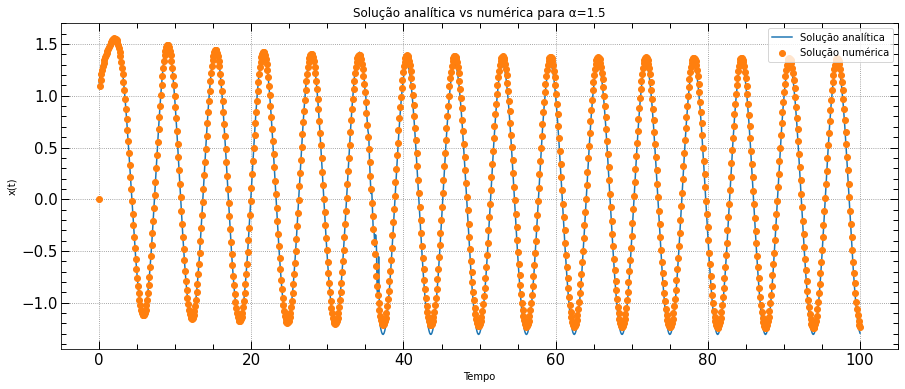

In [9]:
plt.figure(figsize=(15,6))
plt.title('Solução analítica vs numérica para \u03B1=1.5')
plt.plot(t, solu_analitica(t, alpha), label='Solução analítica')   
plt.plot(t, solu_numerica(t, cond_iniciais, alpha),'o', label='Solução numérica')    
plt.ylabel('x(t)')
plt.xlabel('Tempo')
plt.legend()
opt_plot()
plt.show()

* **Solução numérica para diferentes $\alpha$**

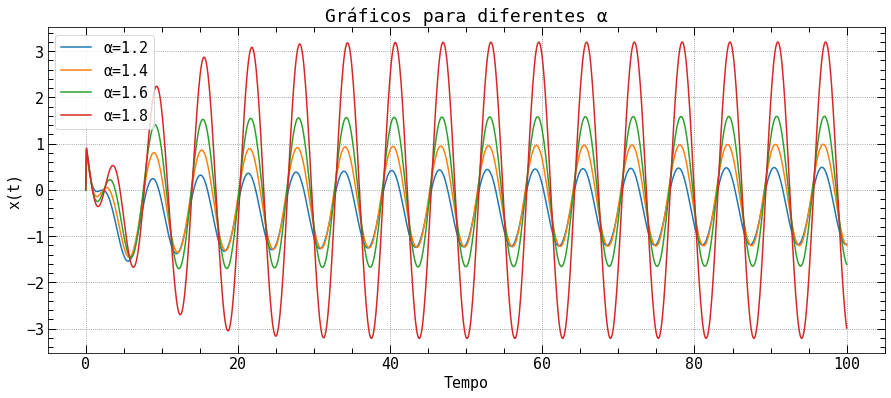

In [10]:
alphas = [1.2, 1.4, 1.6, 1.8]
cond_iniciais = np.array([1,-1])

plt.figure(figsize=(15,6))
plt.title('Gráficos para diferentes \u03B1')
for alpha in alphas:
    plt.plot(t, solu_numerica(t, cond_iniciais, alpha), label=f'\u03B1={alpha}')
    
plt.ylabel('x(t)')
plt.xlabel('Tempo')
plt.legend()
opt_plot()
plt.show()

Observando o caso do oscilador harmônico para $w_0=w =1$ para diferentes valores $\alpha$. Conforme já conhecido da literatura, quando as frequência da fonte externa é igual à frequência natural de oscilação do sistema, no cálculo de ordem inteira, temos o fenômeno da ressonância, ou seja, a amplitude vai crescendo indefinidamente. Contudo, notamos no gráfico e também no exemplo dado pela Eq.11, que enquanto a ordem da derivada fracionária diminui, a oscilação se estabiliza, isto é, além da amplitude do movimento oscilatório ser menor, a ressonância deixa de acontecer. No caso de oscilações forçadas de um sistema mecânico, infere-se deste resultado que mesmo uma força externa com mesma frequência não levará o sistema a se romper.

* **Solução numérica para diferentes $\alpha$ e considerando que $w_0 < w$**

In [11]:
def f(t,x):
    w0 = 0.5
    F0 = 1.
    w = 1.
    return F0*np.sin(w*t) - x*w0**alpha

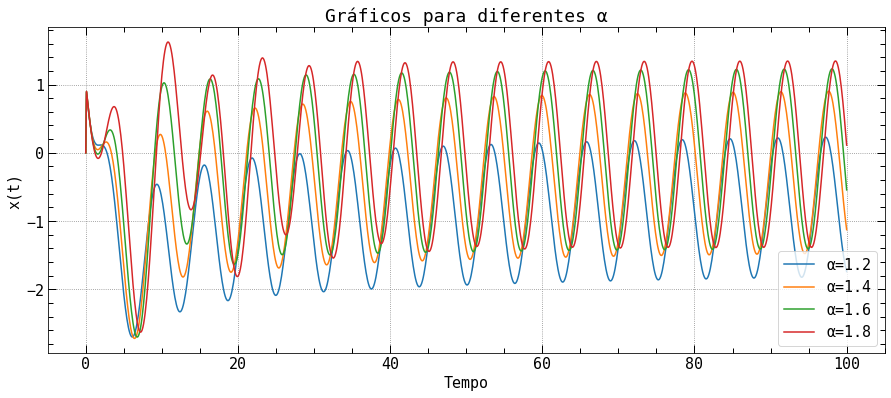

In [12]:
alphas = [1.2, 1.4, 1.6, 1.8]
cond_iniciais = np.array([1,-1])

plt.figure(figsize=(15,6))
plt.title('Gráficos para diferentes \u03B1')
for alpha in alphas:
    plt.plot(t, solu_numerica(t, cond_iniciais, alpha), label=f'\u03B1={alpha}')
    
plt.ylabel('x(t)')
plt.xlabel('Tempo')
plt.legend()
opt_plot()
plt.show()

Podemos ver o caso do oscilador harmônico para $w > w_0$ e para valores defirentes de $\alpha$ . Percebemos que quanto menor é a ordem da derivada fracionária, menor é a amplitude da oscilação. E ainda, percebemos também que neste caso há uma espécie de amortecimento da oscilação, mesmo não tendo considerado ações de forças dissipativas.

## 4. Conclusão

Nesse material foi apresentado conceitos básicos de derivadas fracionadas e suas diversas aplicações. Implementamos a solução numérica e a comparamos coma solução analítica esperada. Uma vez constado que no método mostrou resultados satisfatórios, o aplicamos para estudar o comportamente do oscilador harmônico submetido a uma força externa senoidal, para casos onde $w_0 = w$ e $w_0 \ne w$.

## Referências

****

* **[1]** *K. Diethelm, N.J. Ford e A.D. Freed, Nonlinear Dynamics 29, 3 (2002).*

* **[2]** *A.A. Stanislavsky, Physical Review E 70, 051103 (2004)..*

* **[3]** *R.F. Camargo e E.C. Oliveira, Cálculo fracionário (Livraria da Física, São Paulo, 2015).*

* **[4]** *M. Caputo, Geophysical Journal of the Royal Astronomical Society 13, 529 (1967).*

* **[5]** *R. Herrmann, Fractional Calculus: An Introduction to Physicists (World Scientific, Singapura (2011).*

* **[6]** *X. Guo e M. Xu, Journal of Mathematical Physics 47, 082104 (2006).*

* **[7]** *Solving fractional differential equations numerically,(2017).*